In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


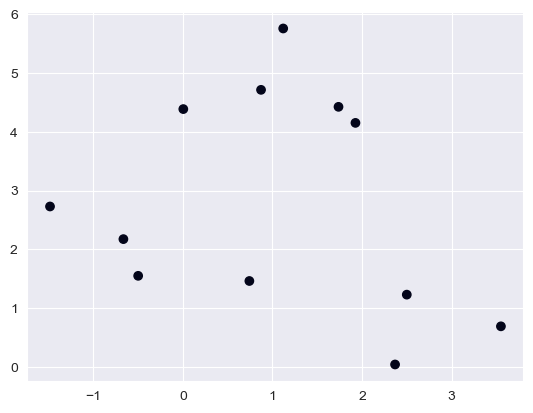

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=clusters);

All data points were assigned the label -1, which stands for noise. This is a consequence of the default parameter settings for eps and min_samples, which are not tuned for small toy datasets. 

- The parameter `eps` is somewhat more important, as it determines what it means for points to be “close.” Setting `eps` to be very small will mean that no points are core samples, and may lead to all points being labeled as noise. Setting `eps` to be very large will result in all points forming a single cluster.

- The `min_samples` setting mostly determines whether points in less dense regions will be labeled as outliers or as their own clusters. If you increase `min_samples`, anything that would have been a cluster with less than `min_samples` many samples will now be labeled as noise. `min_samples` therefore determines the minimum cluster size. 

The cluster assignments for different values of min_samples and eps are shown below:

In [3]:
import itertools

In [4]:
min_samples = [2,3,5]
eps = [1,1.5,2,3]
for i,j in itertools.product(min_samples,eps):
    dbscan = DBSCAN(min_samples = i,eps=j)
    clusters = dbscan.fit_predict(X)
    print ('min samples %s, eps %s Cluster: %s' %(i,j,clusters))

min samples 2, eps 1 Cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min samples 2, eps 1.5 Cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min samples 2, eps 2 Cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min samples 2, eps 3 Cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min samples 3, eps 1 Cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min samples 3, eps 1.5 Cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min samples 3, eps 2 Cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min samples 3, eps 3 Cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min samples 5, eps 1 Cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min samples 5, eps 1.5 Cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min samples 5, eps 2 Cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min samples 5, eps 3 Cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


> Increasing `eps` means that more points will be included in a cluster. This makes clusters grow, but might also lead to multiple clusters joining into one. 

> Increasing `min_samples` means that fewer points will be core points, and more points will be labeled as noise.

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Text(0, 0.5, 'Feature 1')

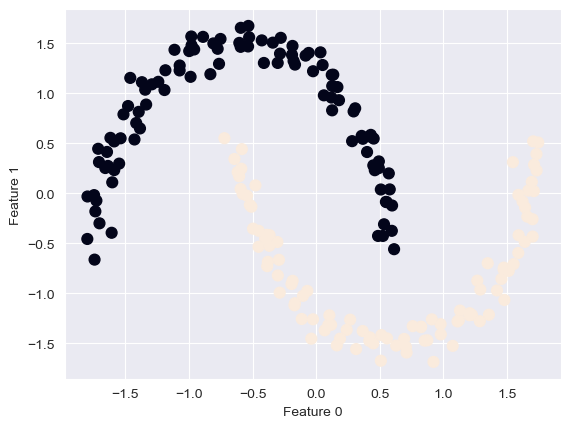

In [6]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [7]:
dbscan.get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

Test eps = 0.7, discuss

Text(0, 0.5, 'Feature 1')

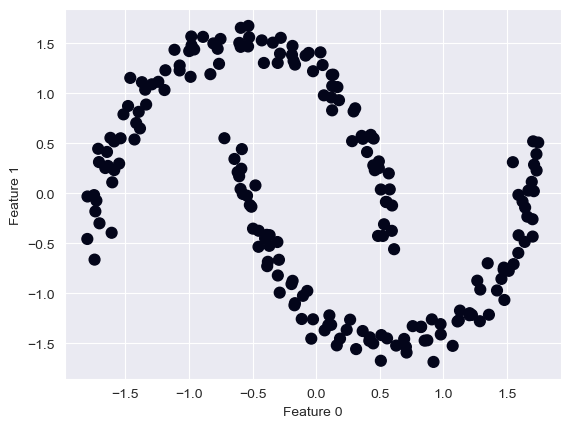

In [8]:
dbscan = DBSCAN(eps=0.7)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Test eps = 0.2, discuss

Text(0, 0.5, 'Feature 1')

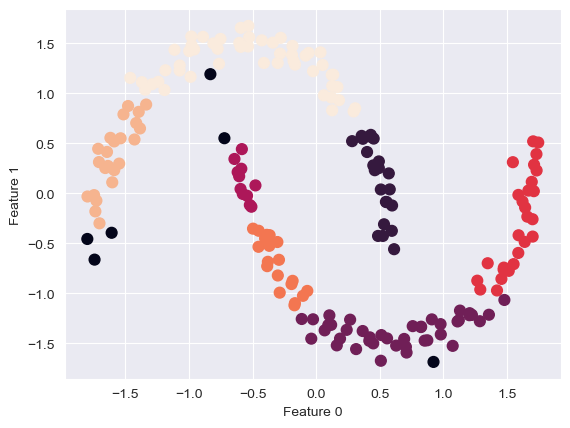

In [11]:
dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")